In [160]:
import cv2
import matplotlib.pyplot as plt

In [161]:
im=cv2.imread('elephant.jpg') #Reads an image into BGR Format
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape=im.shape
print(im.shape)

(412, 612, 3)


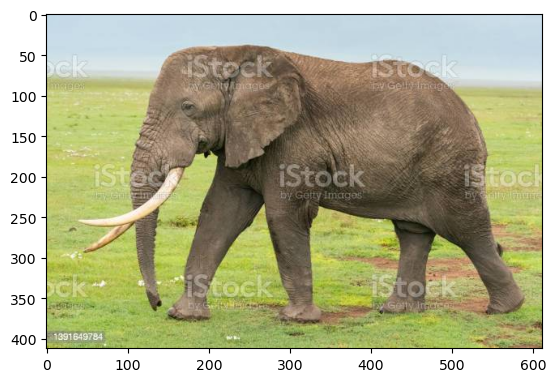

In [162]:
plt.imshow(im)
plt.show()

In [163]:
#Flatten each channel of the image
all_pixels=im.reshape((-1,3))
print(all_pixels.shape)

(252144, 3)


In [164]:
from sklearn.cluster import KMeans

In [165]:
dominat_colors=4

km=KMeans(n_clusters=dominat_colors)
km.fit(all_pixels)


KMeans(n_clusters=4)

In [166]:
import numpy as np

In [167]:
centers=km.cluster_centers_

In [168]:
centers=np.array(centers,dtype='uint8')

In [169]:
print(centers)

[[142 127  93]
 [184 192 109]
 [203 219 225]
 [ 85  74  55]]


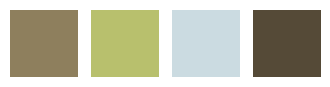

In [170]:
i=1
plt.figure(0,figsize=(4,2))


colors=[]
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    colors.append(each_col)
    
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    
    plt.imshow(a)
    
plt.show()

## Segmenting Our Original Image

In [171]:
new_img=np.zeros((412*612,3),dtype='uint8')

print(new_img.shape)

(252144, 3)


In [172]:
colors

[array([142, 127,  93], dtype=uint8),
 array([184, 192, 109], dtype=uint8),
 array([203, 219, 225], dtype=uint8),
 array([85, 74, 55], dtype=uint8)]

In [173]:
km.labels_

array([2, 2, 2, ..., 0, 0, 0])

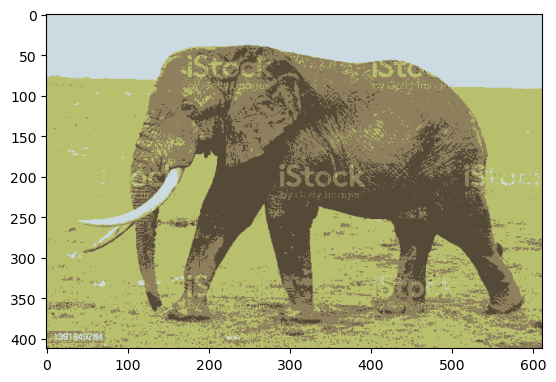

In [174]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
new_img=new_img.reshape((original_shape))

plt.imshow(new_img)
plt.show()
